# Requirements

In [4]:
# Add as many imports as you need.
import pandas as pd
import missingno as msno
import seaborn as sns

# Laboratory Exercise - Run Mode (8 points)

## The Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [3]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("./content/spotify_songs.csv")
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.0724,NaN,0.3570,0.693,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.0794,NaN,0.1100,0.613,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,pop


In [7]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.072400,NaN,0.3570,0.6930,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.079400,NaN,0.1100,0.6130,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,pop
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,NaN,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,edm
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,edm
32830,0.529,0.821,-4.899,0.0481,0.108000,NaN,0.1500,0.4360,127.989,edm
32831,0.626,NaN,NaN,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,edm


Preprocess the input and the output variables appropriately.

In [5]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

In [6]:
df['genre'].value_counts()

genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

Explore the dataset using visualizations of your choice.

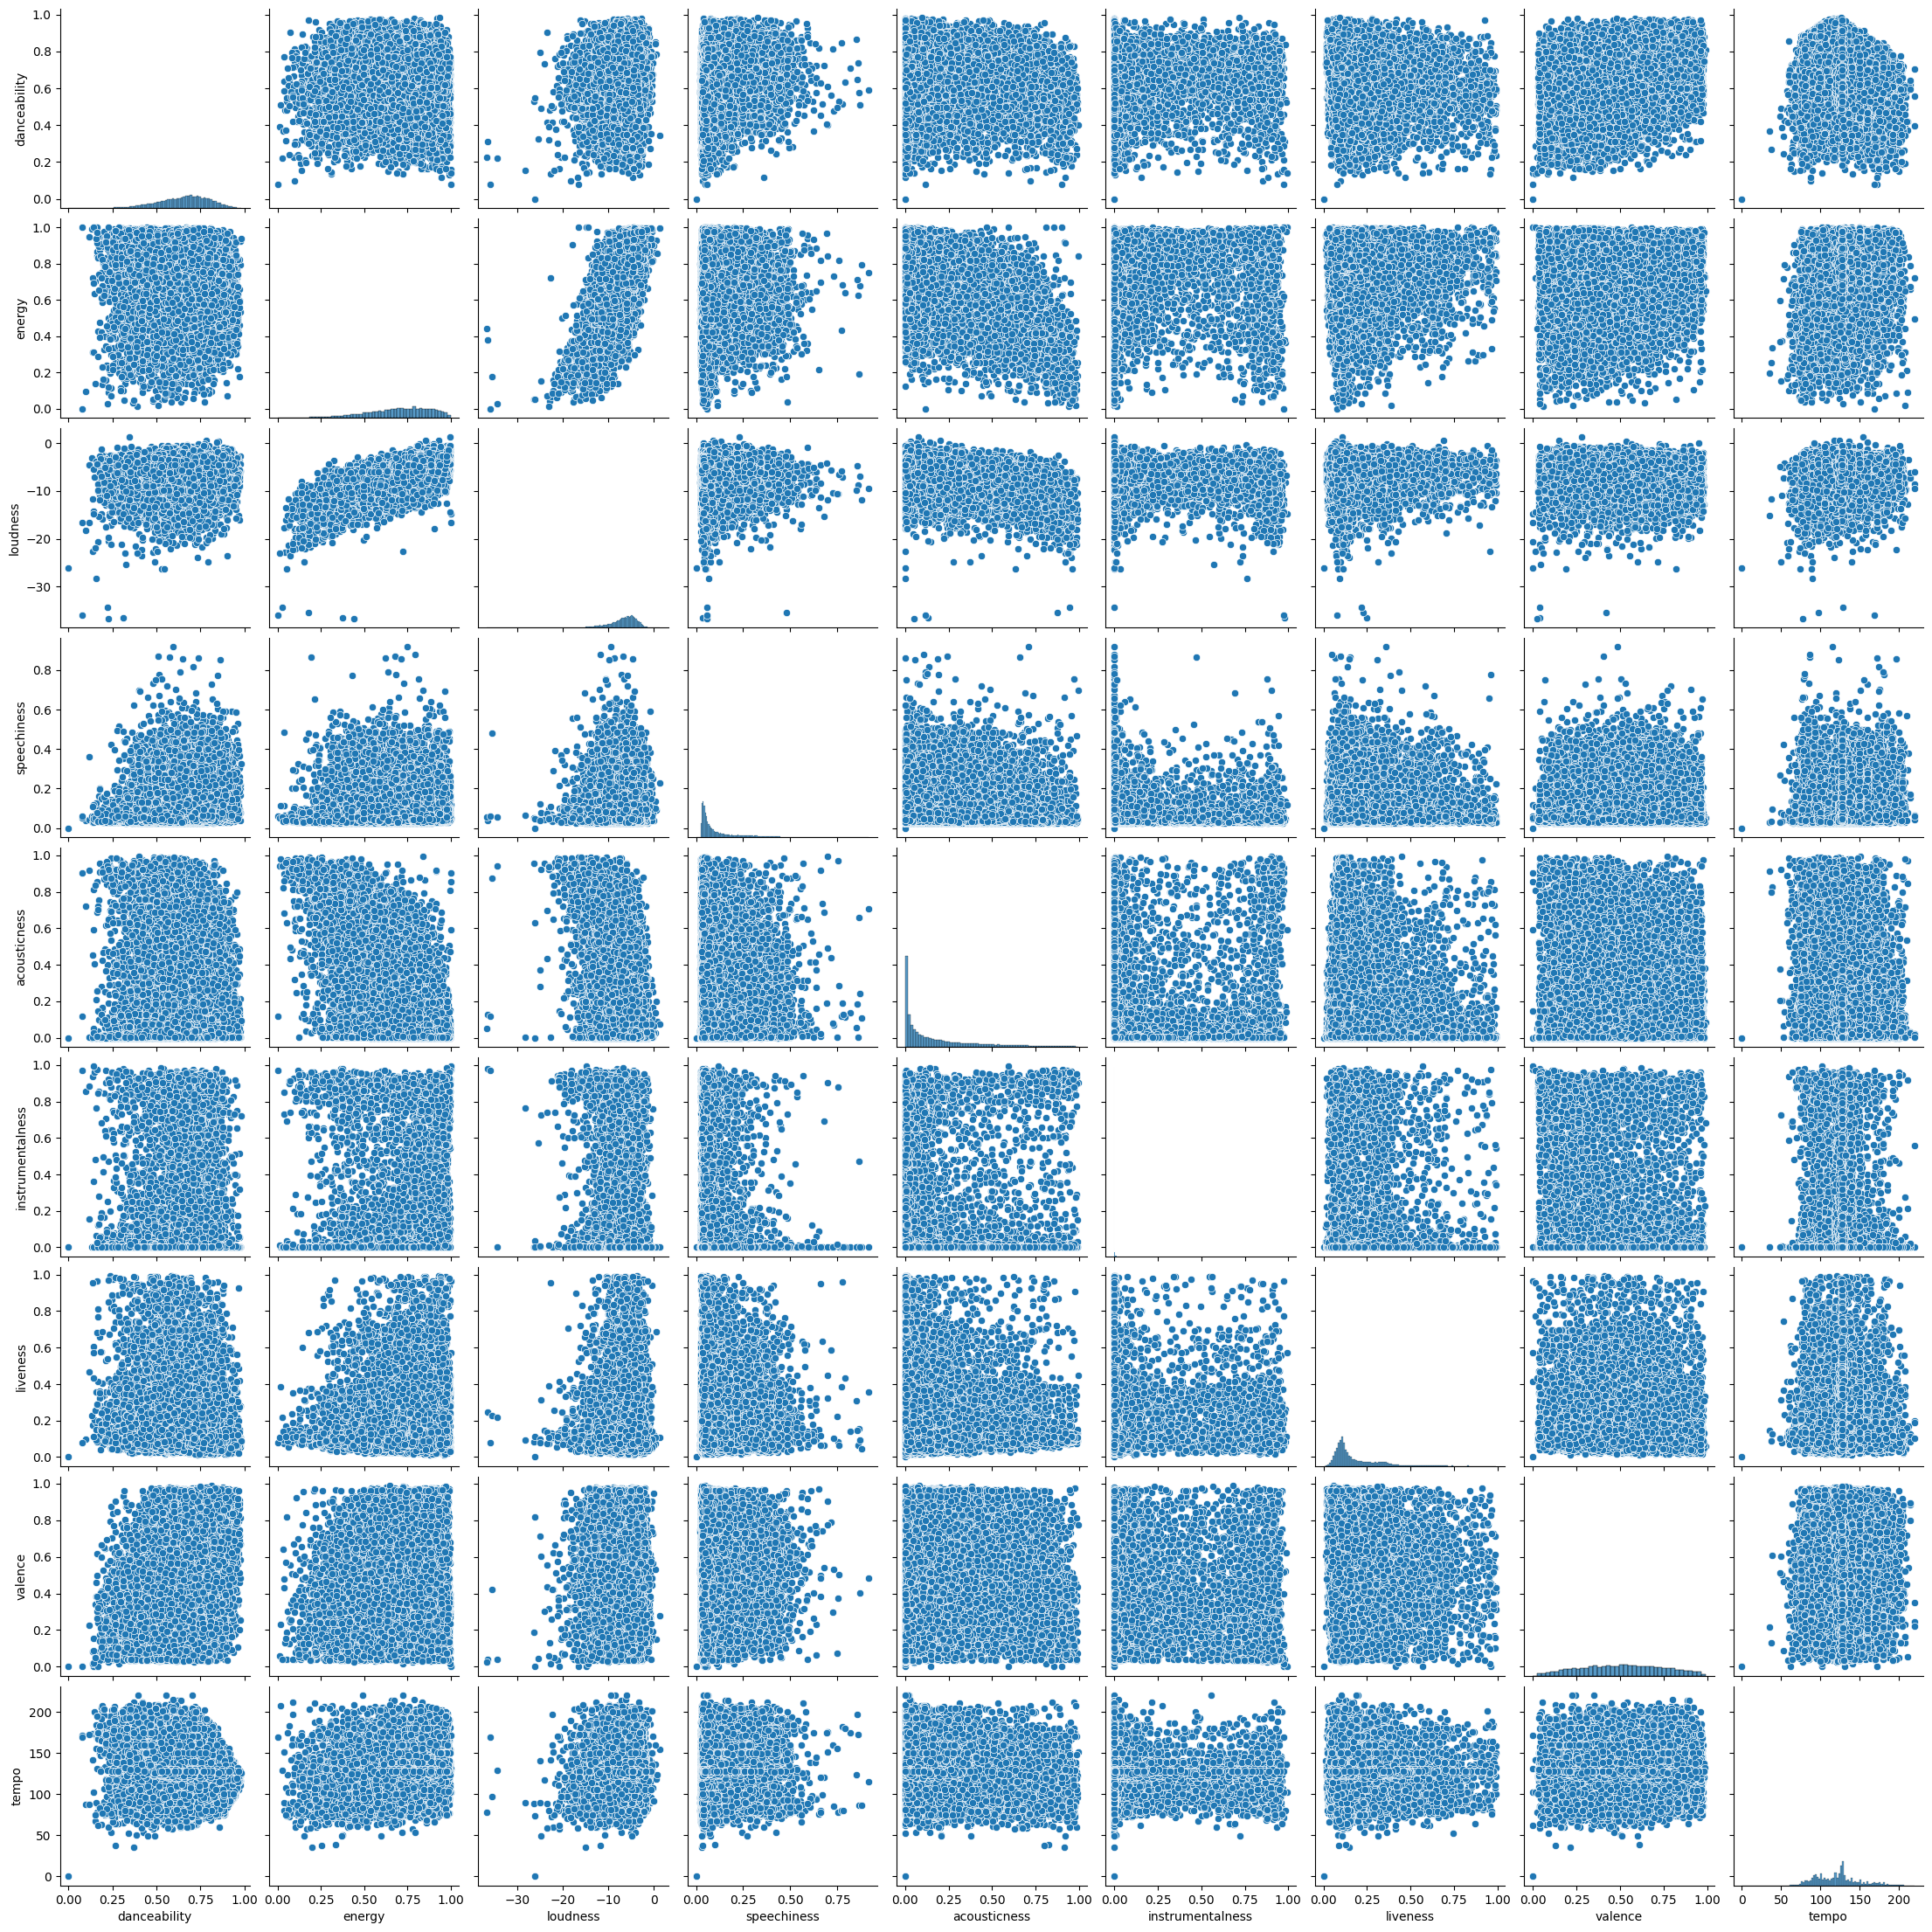

In [8]:
# Write your code here. Add as many boxes as you need.
sns.pairplot(df)

Check if the dataset is balanced.

In [9]:
# Write your code here. Add as many boxes as you need.
df['tempo'].value_counts()

tempo
127.992    34
127.994    28
128.007    26
127.983    25
128.005    24
           ..
112.503     1
147.992     1
150.636     1
149.410     1
128.170     1
Name: count, Length: 15279, dtype: int64

In [46]:
df['genre'].value_counts()

genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [12]:
# Write your code here. Add as many boxes as you need.
missing_values = df.isnull().sum()
missing_values_per = (missing_values / len(df)) * 100
missing_values_per

danceability        11.153413
energy              34.297810
loudness            23.208357
speechiness          7.190936
acousticness         2.722870
instrumentalness    19.705784
liveness             9.094509
valence             22.809369
tempo               19.970761
genre                0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

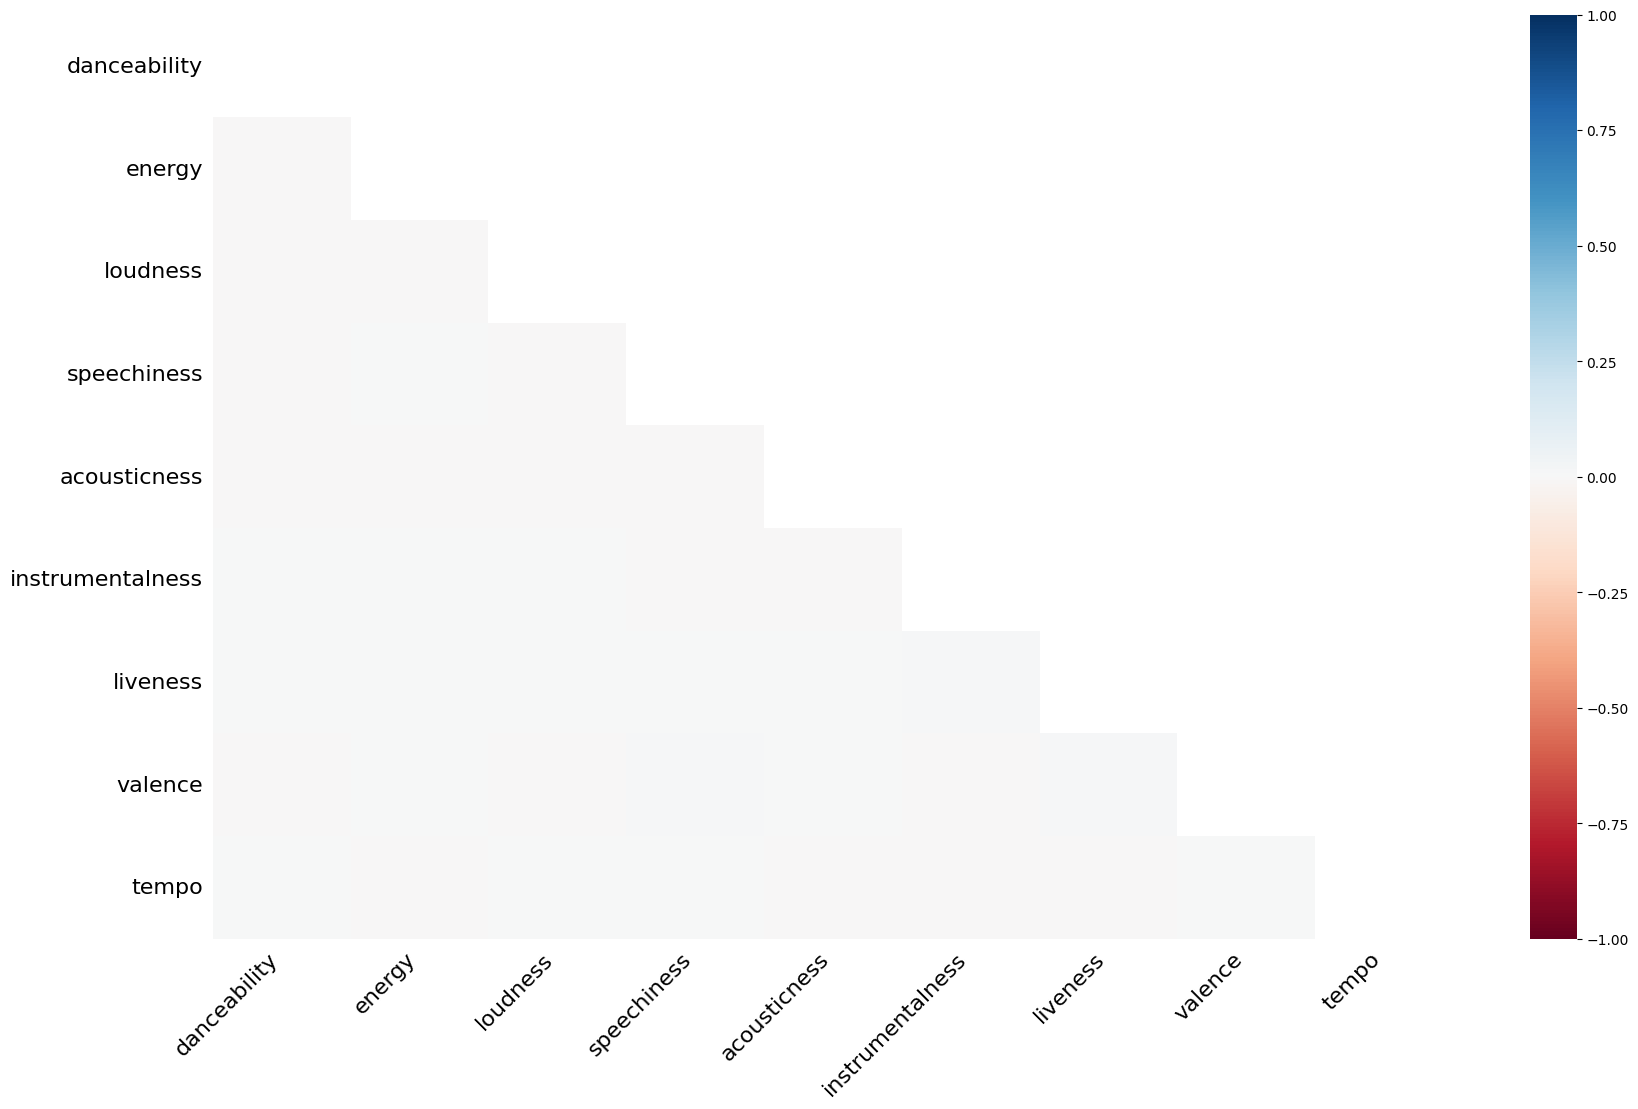

In [13]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [17]:
# Write your code here. Add as many boxes as you need.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='constant', fill_value=0)

In [18]:
train = df.copy()
train.iloc[:, :] = imp.fit_transform(train)

In [20]:
train.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [21]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split

In [23]:
list = train_test_split(train.iloc[: ,:-1], train['genre'], test_size=0.2)

In [24]:
x_train, x_test, y_train, y_test = list

## Feature Scaling
Standardize the features appropriately.

In [26]:
# Write your code here. Add as many boxes as you need.
train.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,pop
1,0.726,0.000,-4.969,0.0373,0.0724,0.000000,0.3570,0.693,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.0794,0.000000,0.1100,0.613,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,0.000,pop
4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,pop


## Model Selection

Choose and train an approriate model for the given task.

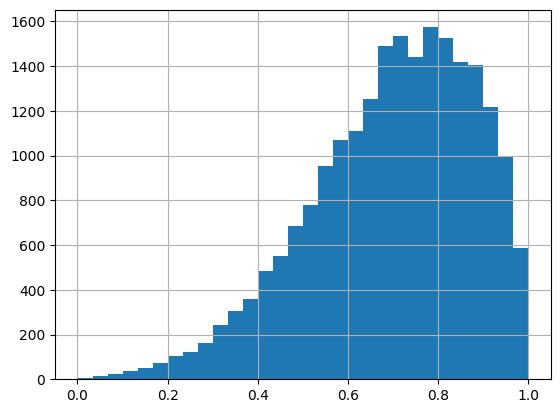

In [29]:
# Write your code here. Add as many boxes as you need.
import matplotlib.pyplot as plt
df['energy'].hist(bins=30)
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [32]:
x_train

array([[ 1.11104888,  0.10630558, -1.10956689, ...,  0.29989591,
         0.24461291,  0.2484662 ],
       [-2.35834552, -1.26562601, -0.41731102, ..., -0.51737869,
        -1.3263887 ,  0.46670522],
       [-2.35834552,  0.86266223,  0.28428213, ..., -0.85394088,
         0.83795258,  0.17218345],
       ...,
       [-0.40125125,  0.89302691,  0.17067851, ..., -0.41768008,
        -0.09925439,  1.53738546],
       [-2.35834552, -1.26562601,  1.33524534, ...,  0.96031983,
        -0.86115646, -0.31395245],
       [ 0.35489881,  1.26292396,  1.33524534, ...,  0.42055028,
         1.38072352,  0.54226588]])

In [33]:
x_test

array([[ 6.10365562e-02,  9.02019722e-01,  4.03704580e-01, ...,
         9.06448821e-01,  1.88641328e+00,  1.26683821e-01],
       [-2.32829245e+00,  1.04818777e+00,  1.32185279e-03, ...,
         2.93487785e-01,  1.06074622e+00, -7.28099457e-02],
       [-2.32829245e+00,  7.66883226e-01,  2.33558483e-02, ...,
        -4.42065457e-01, -1.34519344e+00,  2.96254448e-01],
       ...,
       [ 5.60660159e-01,  8.66167182e-01, -2.95612467e-01, ...,
        -3.00116586e-01, -2.86038571e-01, -1.79226239e+00],
       [ 8.02413515e-01, -1.26567999e+00,  1.76019960e-01, ...,
         9.45162149e-01, -1.34519344e+00,  2.78814694e-01],
       [-2.32829245e+00, -1.26567999e+00, -5.98842215e-01, ...,
        -5.22718225e-01, -6.10891184e-01, -2.70861188e-01]])

Use the trained model to make predictions for the test set.

In [54]:
# Write your code here. Add as many boxes as you need.
from sklearn.neighbors import KNeighborsClassifier
cls = KNeighborsClassifier(n_neighbors=3)


In [55]:
cls.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_pred = cls.predict(x_test)
y_pred

array(['pop', 'latin', 'pop', ..., 'rap', 'latin', 'pop'], dtype=object)

Assess the performance of the model by using different classification metrics.

In [57]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         edm       0.36      0.63      0.46      1218
       latin       0.26      0.37      0.31      1003
         pop       0.23      0.21      0.22      1072
         r&b       0.29      0.18      0.22      1083
         rap       0.54      0.35      0.43      1155
        rock       0.54      0.35      0.42      1036

    accuracy                           0.35      6567
   macro avg       0.37      0.35      0.34      6567
weighted avg       0.37      0.35      0.35      6567



In [59]:
print(confusion_matrix(y_test, y_pred))

[[762 132 153  49  52  70]
 [262 369 148 110  82  32]
 [371 231 228  95  53  94]
 [228 277 170 194 146  68]
 [203 243 116 140 408  45]
 [266 145 169  75  19 362]]


In [60]:
f1_score(y_test, y_pred, average='micro')

0.3537383889142683

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.3537383889142683

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.


## Feature Scaling
Standardize the features appropriately.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.